In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS
import nltk
import string

In [4]:
fake = pd.read_csv('Fake.csv')
news = pd.read_csv('True.csv')

## Let's take a look at Real News

In [5]:
news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
news['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

## Let's take a look at Fake News

In [8]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [11]:
news['is_fake'] = 0 # contains only news
fake['is_fake'] = 1 # contains only fakes

data = pd.concat([news, fake])
data = data.reset_index()

data = data.sample(frac=1)

In [12]:
data.duplicated().sum()

0

In [13]:
#ignoring dates and subjects because they are disjoints
data = data.drop(['date', 'subject'], axis=1)


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train.drop('is_fake', axis=1)
y_train = train['is_fake']
X_test = test.drop('is_fake', axis=1)
y_test = test['is_fake']

In [15]:
y_train.value_counts()

1    18800
0    17118
Name: is_fake, dtype: int64

In [16]:
y_test.value_counts()

1    4681
0    4299
Name: is_fake, dtype: int64

In [17]:
train_news = X_train.loc[(y_train==0),:]
train_fake = X_train.loc[(y_train==1),:]

## Lexical Diversity of Fake News
To find unique vocabulary used in Fake News articles.

The lexical diversity measure are $\frac{\text{number of unique words in one (target)category}}{\text{number of words in both (target)categories}}$

In [18]:
def lexical_diversity(data, other_data, feature):
    # ignoare capital letters
    column = data[feature].str.lower() 
    # create one text from the column
    text = ' '.join(column)
    # drop punctuation
    exclude = set(string.punctuation)
    words = ''.join(char for char in text if char not in exclude)
    # create a list of words instead of one huge text
    words_splitted = words.split()
    
    # analogously
    other_column = other_data[feature].str.lower() 
    other_text = ' '.join(other_column)
    other_words = ''.join(char for char in other_text if char not in exclude)
    other_words_splitted = other_words.split()
    # lexical diversity measure
    return len(set(words_splitted)) / (len(words_splitted) + len(other_words_splitted))

print(f'Real News: {lexical_diversity(data=train_news, other_data=train_fake, feature="text")}')
print(f'Fake News: {lexical_diversity(data=train_fake, other_data=train_news, feature="text")}')

Real News: 0.006284625312956002
Fake News: 0.01156686896267438


More use of vocabulary in fake news articles

In [19]:
stopwords = set(STOPWORDS)

def common_tokens_title(data, feature, name):
    column = data[feature].str.lower() 
    text = ' '.join(column)
    exclude = set(string.punctuation)
    words = ''.join(char for char in text if char not in exclude)
    words_splitted = words.split()
    words_stopped = [word for word in words_splitted if not word in stopwords]
    print(f'{name}:\n{pd.DataFrame(nltk.FreqDist(words_stopped).most_common(10))[0]}')
    
common_tokens_title(train_news, 'title', 'Most common descriptive words in Real News Titles')
print('\n')
common_tokens_title(train_fake, 'title', 'Most common descriptive words in Fake News Titles')

Most common descriptive words in Real News Titles:
0     trump
1        us
2      says
3     house
4     north
5       new
6     white
7    russia
8     korea
9     court
Name: 0, dtype: object


Most common descriptive words in Fake News Titles:
0        video
1        trump
2        watch
3        obama
4      hillary
5      trump’s
6    president
7           us
8      clinton
9         will
Name: 0, dtype: object


# Punctutation
Punctuation might provide some information for predictions. 

In [20]:
import regex as re

# let's begin with a helper function to count punctuation
def count_punctuation(text):
    peri = re.subn(r"\.", '', text)[1]
    comm = re.subn(r"\,", '', text)[1]
    ques = re.subn(r"\?", '', text)[1]
    excl = re.subn(r"\!", '', text)[1]
    return [peri,comm, ques, excl]
    
count_punctuation('...alph!a.beta.gamma...??')

[8, 0, 2, 1]

In [21]:

def create_punctuation_df(dataset, feature):
    return dataset.apply(lambda row: pd.Series({'peri_' + feature:count_punctuation(row[feature])[0], 
                                                       'comm_' + feature:count_punctuation(row[feature])[1],
                                                      'ques_' + feature:count_punctuation(row[feature])[2],
                                                      'excl_' + feature:count_punctuation(row[feature])[3]}), axis=1)

punctuation_train_title = create_punctuation_df(train, 'title')
punctuation_test_title = create_punctuation_df(test, 'title')
punctuation_train_text = create_punctuation_df(train, 'text')
punctuation_test_text = create_punctuation_df(test, 'text')
punctuation_train_text 

,peri_text,comm_text,ques_text,excl_text
6665,6,1,0,0
9566,20,22,0,0
34682,22,24,1,1
8479,13,12,0,0
13616,2,6,0,0
...,...,...,...,...
16026,29,20,0,0
13667,8,2,0,0
23671,30,23,1,1
36147,19,14,0,2


# Text Length

In [22]:
# count the text length per row for both features (title and text)
# and store the information in a dataframe
def create_len_df(dataset):
    return dataset.apply(lambda row: pd.Series({'length_title':len(row['title']),
                                               'length_text':len(row['text'])}), axis=1)

len_train = create_len_df(train)
len_test = create_len_df(test)

len_train

,length_title,length_text
6665,65,424
9566,63,2101
34682,103,2244
8479,53,1404
13616,73,418
...,...,...
16026,73,3268
13667,79,655
23671,83,2433
36147,95,1682


In [23]:
def create_num_words_df(dataset):
    return dataset.apply(lambda row: pd.Series({'num_words_title':len(row['title'].split())}), axis=1)

num_words_train = create_num_words_df(train)
num_words_test = create_num_words_df(test)

num_words_train

,num_words_title
6665,10
9566,11
34682,16
8479,8
13616,13
...,...
16026,11
13667,14
23671,14
36147,12


In [24]:
def create_title_ratio_df(dataset):
    return dataset.apply(lambda row: pd.Series({'title_ratio':len(row['title'])/(len(row['title']) + len(row['text']))}), axis=1)

title_ratio_train = create_title_ratio_df(train)
title_ratio_test = create_title_ratio_df(test)

title_ratio_train

,title_ratio
6665,0.132924
9566,0.029113
34682,0.043886
8479,0.036376
13616,0.148676
...,...
16026,0.021850
13667,0.107629
23671,0.032989
36147,0.053461


## Concatenate the new Datasets

In [25]:
X_train_punct_len = pd.concat([punctuation_train_title, 
                               punctuation_train_text, 
                               len_train, 
                               num_words_train, 
                               title_ratio_train], 
                              axis=1)

X_test_punct_len = pd.concat([punctuation_test_title, 
                              punctuation_test_text, 
                              len_test, 
                              num_words_test, 
                              title_ratio_test], 
                             axis=1)

X_train_punct_len

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
6665,0,0,0,0,6,1,0,0,65,424,10,0.132924
9566,0,0,0,0,20,22,0,0,63,2101,11,0.029113
34682,0,0,0,0,22,24,1,1,103,2244,16,0.043886
8479,0,0,0,0,13,12,0,0,53,1404,8,0.036376
13616,1,0,0,0,2,6,0,0,73,418,13,0.148676
...,...,...,...,...,...,...,...,...,...,...,...,...
16026,0,0,0,0,29,20,0,0,73,3268,11,0.021850
13667,2,0,0,0,8,2,0,0,79,655,14,0.107629
23671,0,0,0,0,30,23,1,1,83,2433,14,0.032989
36147,0,1,0,0,19,14,0,2,95,1682,12,0.053461


# Investigate the Engineered Features

In [26]:
X_train_punct_len.describe()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
count,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000
mean,0.274737,0.225319,0.041901,0.080739,20.971602,20.226126,0.679353,0.405507,80.081268,2471.798151,12.444568,0.071858
std,0.703008,0.496879,0.212897,0.300803,18.271862,20.170080,1.771020,1.319272,25.331473,2170.471778,4.092736,0.135813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000583
25%,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,0.000000,0.000000,63.000000,1235.000000,10.000000,0.023323
50%,0.000000,0.000000,0.000000,0.000000,18.000000,17.000000,0.000000,0.000000,73.000000,2188.000000,11.000000,0.034865
75%,0.000000,0.000000,0.000000,0.000000,27.000000,26.000000,1.000000,0.000000,91.000000,3101.000000,14.000000,0.063690
max,6.000000,5.000000,3.000000,4.000000,551.000000,420.000000,94.000000,67.000000,286.000000,49705.000000,42.000000,0.995556


* Many Titles don't contain any form of `punctuation`!

* Some texts contain suspiciously small amounts of characters. At least one of them contains only 1 chars

Let's remove some extreme outliers!

In [27]:
from scipy import stats
X_train_punct_len_zscore = X_train_punct_len.apply(stats.zscore, axis=0)
mask_outliers = np.logical_not(((X_train_punct_len_zscore>5).any(axis=1)).values + ((X_train_punct_len_zscore<-5).any(axis=1)).values)
X_train_punct_len = X_train_punct_len.loc[mask_outliers,:]
y_train = y_train[X_train_punct_len.index]

In [28]:
X_train_punct_len.describe()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
count,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000,34192.000000
mean,0.265939,0.215489,0.034950,0.060219,20.400386,19.496578,0.579405,0.325485,79.113243,2397.731516,12.284803,0.057251
std,0.668612,0.462835,0.183655,0.237895,14.541668,15.105569,1.267923,0.894817,24.187894,1609.550770,3.901550,0.072985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,20.000000,1.000000,0.003235
25%,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,0.000000,0.000000,63.000000,1289.000000,10.000000,0.023329
50%,0.000000,0.000000,0.000000,0.000000,18.000000,17.000000,0.000000,0.000000,73.000000,2199.000000,11.000000,0.034515
75%,0.000000,0.000000,0.000000,0.000000,27.000000,26.000000,1.000000,0.000000,90.000000,3078.000000,14.000000,0.060606
max,3.000000,2.000000,1.000000,1.000000,111.000000,118.000000,9.000000,7.000000,206.000000,12985.000000,32.000000,0.750000


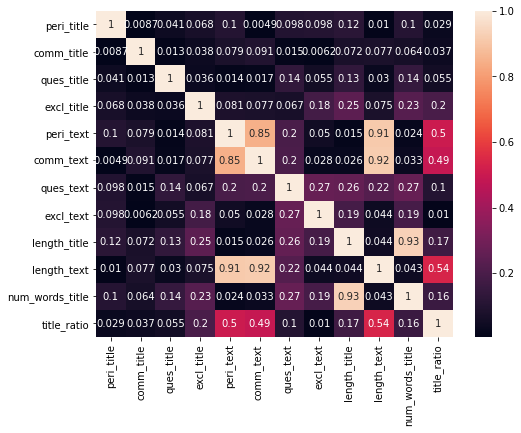

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(np.abs(X_train_punct_len.corr()), annot=True)
plt.savefig('correlation')
plt.show()

* huge correlation between `peri_text` and `length_text`

* huge correlation between `comm_text` and `length_text`

* huge correlation between `comm_text` and `peri_text`

* huge correlation between `peri_test` and `num_words_text`

...and so on

## How do they Interact with the Target?

In [30]:
pd.concat([X_train_punct_len, y_train], axis=1).groupby('is_fake').mean()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
is_fake,,,,,,,,,,,,
0,0.443414,0.245659,0.005611,0.000709,20.736090,19.218133,0.092971,0.054755,64.667513,2365.246131,9.952451,0.048532
1,0.091878,0.185900,0.063724,0.118584,20.071139,19.769667,1.056482,0.591009,93.281138,2429.592110,14.572298,0.065802


**Main Findings:**
* Titles of Fake News contain ~4 times less `periods`

* Titles of Fake News contain ~10 times more `question marks`

* Titles of Fake News contain ~130 times more `exclamation marks` 

* Texts of Fake News contain ~10 times more `question marks` 

* Texts of Fake News contain ~10 times more `exclamation marks`

* Titles of Fake News are 50% `longer`. The number of words seems to reflect that fact as well. -> The length of words in the titles of Fake News and real News don't seem to vary a lot.

* $\frac{len(title)}{len(title) + len(text)}$ is ~40% longer in Fake News

* Let's ignore the high correlations we found above. A more elaborate approach would be to eliminate correlating features by dropping them or using dimensionality reduction like PCA

# A Simple Model based on Punctuation and Text Length
RandomForest for our classification!

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
preds = cross_val_predict(rf, X_train_punct_len, y_train, cv=5)
f1 = f1_score(y_true=y_train, y_pred=preds)
acc = accuracy_score(y_true=y_train, y_pred=preds)
print(f'f1: {f1}\nacc: {acc}')

f1: 0.9237802197802197
acc: 0.9239295741693964


In [32]:
rf.fit(X_train_punct_len, y_train)
pd.Series(rf.feature_importances_, 
          index=X_train_punct_len.columns).sort_values(ascending=False)

length_title       0.311736
num_words_title    0.168124
ques_text          0.110972
title_ratio        0.093478
length_text        0.086901
excl_text          0.054821
peri_text          0.051729
comm_text          0.049232
peri_title         0.035872
excl_title         0.019800
comm_title         0.011048
ques_title         0.006287
dtype: float64

## Finetune the model

In [33]:
from sklearn.model_selection import GridSearchCV
params= {'n_estimators':[200, 300],
        'criterion':['gini', 'entropy'],
        'max_depth':[5, None],
        'max_features':[2,5]}
gscv = GridSearchCV(rf, params)
gscv.fit(X_train_punct_len, y_train)
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'n_estimators': 200}

In [34]:
rf_tuned = RandomForestClassifier(criterion='entropy', max_depth=None, max_features=2, n_estimators=200, random_state=42)
preds = cross_val_predict(rf_tuned, X_train_punct_len, y_train, cv=5)
f1 = f1_score(y_true=y_train, y_pred=preds)
acc = accuracy_score(y_true=y_train, y_pred=preds)
print(f'f1: {f1}\nacc: {acc}')

f1: 0.9259910860896083
acc: 0.9261815629386991


In [36]:
rf_tuned.fit(X_train_punct_len, y_train)
pd.Series(rf_tuned.feature_importances_, 
          index=X_train_punct_len.columns).sort_values(ascending=False)

length_title       0.255847
num_words_title    0.173495
title_ratio        0.109974
length_text        0.098700
ques_text          0.097415
peri_text          0.063516
comm_text          0.063101
excl_text          0.053339
peri_title         0.038382
excl_title         0.025276
comm_title         0.012695
ques_title         0.008262
dtype: float64

## Final Prediction on Test

In [37]:
preds_test = rf_tuned.predict(X_test_punct_len) 
f1 = f1_score(y_true=y_test, y_pred=preds_test)
acc = accuracy_score(y_true=y_test, y_pred=preds_test)
print(f'f1: {f1}\nacc: {acc}')

f1: 0.9359690588740868
acc: 0.933630289532294


In [38]:
forest = RandomForestClassifier(random_state=42)

best_column = 'all'
best_score = 0
for column in X_train_punct_len.columns:
    forest.fit(X_train_punct_len[column].values.reshape((-1,1)), y_train)
    preds = cross_val_predict(forest, X_train_punct_len[column].values.reshape((-1,1)), y_train, cv=5)
    f1 = f1_score(y_true=y_train, y_pred=preds)
    
    if(f1>best_score):
        best_score = f1
        best_column = column

print(f'A default RandomForest already obtains an f1-score of {f1} on validation data when trained solely on the column {column}')

A default RandomForest already obtains an f1-score of 0.6726821565531244 on validation data when trained solely on the column title_ratio


In [39]:
forest = RandomForestClassifier(random_state=42)
punctuation = ['peri_title', 'comm_title', 'ques_title', 'excl_title', 'peri_text', 'comm_text', 'ques_text', 'excl_text']
lenght = ['length_title', 'length_text','num_words_title', 'title_ratio']


forest.fit(X_train_punct_len[punctuation], y_train)
preds = cross_val_predict(forest, X_train_punct_len[punctuation], y_train, cv=5)
f1 = f1_score(y_true=y_train, y_pred=preds)
print(f'A default RandomForest already obtains an f1-score of {f1} when trained solely on punctuation-based Features')
print('The Feature Inportances in that approach are:')
print(pd.Series(forest.feature_importances_, 
          index=punctuation).sort_values(ascending=False))

forest.fit(X_train_punct_len[lenght], y_train)
preds = cross_val_predict(forest, X_train_punct_len[lenght], y_train, cv=5)
f1 = f1_score(y_true=y_train, y_pred=preds)
print(f'A default RandomForest already obtains an f1-score of {f1} when trained solely on length-based Features')
print('The Feature Importances in that approach are:')
print(pd.Series(forest.feature_importances_, 
          index=lenght).sort_values(ascending=False))

A default RandomForest already obtains an f1-score of 0.7789332438778934 when trained solely on punctuation-based Features
The Feature Inportances in that approach are:
ques_text     0.270685
comm_text     0.202262
peri_text     0.197163
excl_text     0.135968
peri_title    0.084638
excl_title    0.070547
ques_title    0.024891
comm_title    0.013846
dtype: float64
A default RandomForest already obtains an f1-score of 0.8606696768896968 when trained solely on length-based Features
The Feature Importances in that approach are:
length_title       0.413140
title_ratio        0.213775
length_text        0.197857
num_words_title    0.175227
dtype: float64


The End